# Label augmentation

Synthesis-based augmentation has has great success for training 
networks that are invariant to traits such as contrast or resolution.
Most synthesis engines start from a label map from which intensities are
sampled. We have an array of functions that can be used to augment the 
label map themselves, and to convert them to intensity image.

In [1]:
import torch
import matplotlib.pyplot as plt
from cornucopia.utils.py import meshgrid_ij
from cornucopia import (
    RandomSmoothLabelMap,
    RandomGaussianMixtureTransform,
    RandomErodeLabelTransform,
    RandomDilateLabelTransform,
    RandomSmoothMorphoLabelTransform,
    SmoothBernoulliTransform,
    BernoulliDiskTransform,
    SmoothBernoulliDiskTransform,
    random,
)

Although it is possible to start from an existing label map,
we can also generate entirely synthetic labels with varying shapes 
by taking the argmax of smooth random fields, as described in:

Hoffmann, M., Billot, B., Greve, D.N., Iglesias, J.E., Fischl, B. and Dalca, A.V., 2021. 
[**SynthMorph: learning contrast-invariant registration without acquired images**](https://doi.org/10.1109/TMI.2021.3116879). 
_IEEE transactions on medical imaging_, 41(3), pp.543-558.

        @article{hoffmann2021synthmorph,
            title={SynthMorph: learning contrast-invariant registration without acquired images},
            author={Hoffmann, Malte and Billot, Benjamin and Greve, Douglas N and 
                    Iglesias, Juan Eugenio and Fischl, Bruce and Dalca, Adrian V},
            journal={IEEE transactions on medical imaging},
            volume={41},
            number={3},
            pages={543--558},
            year={2021},
            publisher={IEEE}
        }

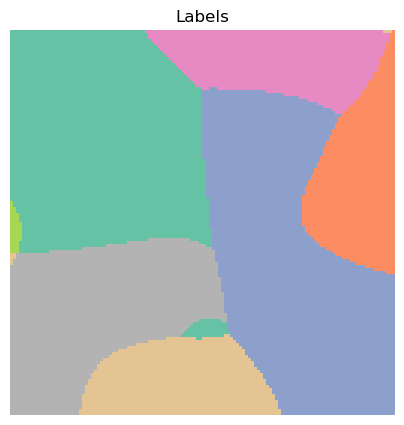

In [2]:
xform = RandomSmoothLabelMap(nb_classes=random.Fixed(8))

lab = xform(torch.empty([]).expand([1, 128, 128]))

plt.figure(figsize=(5, 5))
plt.imshow(lab.squeeze(), cmap='Set2', interpolation='nearest')
plt.axis('off')
plt.title('Labels')
plt.show()

It is then possible to randomly dilate or erode some of the labels

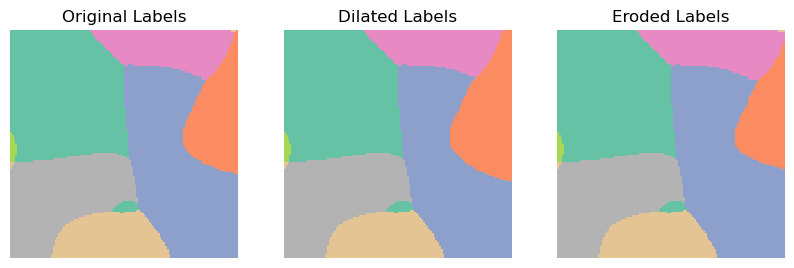

In [3]:
vmax = lab.max()
dlab = RandomDilateLabelTransform(labels=[1], radius=8)(lab)
elab = RandomErodeLabelTransform(labels=[1], radius=8)(lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(lab.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax)
plt.axis('off')
plt.title('Original Labels')
plt.subplot(1, 3, 2)
plt.imshow(dlab.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax)
plt.axis('off')
plt.title('Dilated Labels')
plt.subplot(1, 3, 3)
plt.imshow(elab.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax)
plt.axis('off')
plt.title('Eroded Labels')
plt.show()

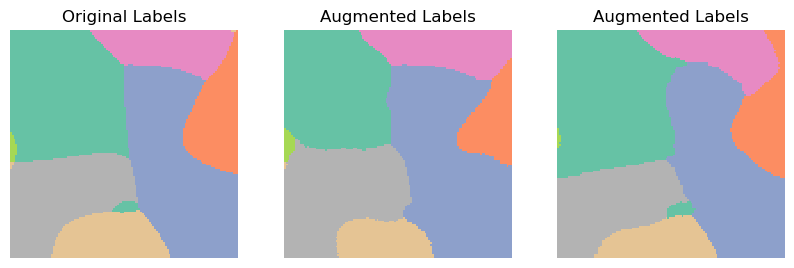

In [4]:
vmax = lab.max()
xform = RandomSmoothMorphoLabelTransform(min_radius=-32, max_radius=32, shape=16)
lab1 = xform(lab)
lab2 = xform(lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(lab.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax)
plt.axis('off')
plt.title('Original Labels')
plt.subplot(1, 3, 2)
plt.imshow(lab1.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax)
plt.axis('off')
plt.title('Augmented Labels')
plt.subplot(1, 3, 3)
plt.imshow(lab2.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax)
plt.axis('off')
plt.title('Augmented Labels')
plt.show()

We also have code to generate label noise (i.e. random masking)

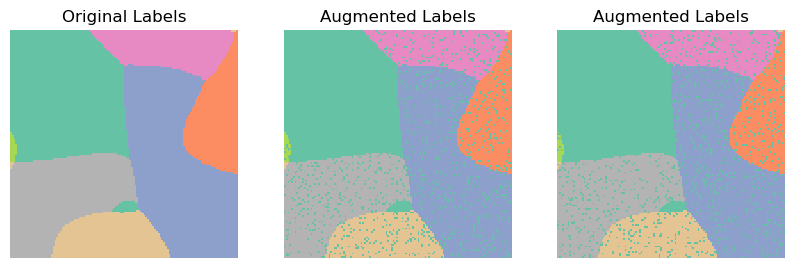

In [5]:
vmax = lab.max()
xform = SmoothBernoulliTransform()
lab1 = xform(lab)
lab2 = xform(lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(lab.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax)
plt.axis('off')
plt.title('Original Labels')
plt.subplot(1, 3, 2)
plt.imshow(lab1.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax)
plt.axis('off')
plt.title('Augmented Labels')
plt.subplot(1, 3, 3)
plt.imshow(lab2.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax)
plt.axis('off')
plt.title('Augmented Labels')
plt.show()

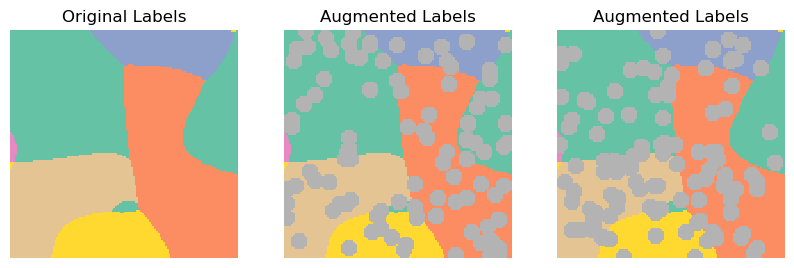

In [6]:
vmax = lab.max()
xform = BernoulliDiskTransform(radius=5, value=vmax+1, method='l2')
lab1 = xform(lab)
lab2 = xform(lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(lab.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax+2)
plt.axis('off')
plt.title('Original Labels')
plt.subplot(1, 3, 2)
plt.imshow(lab1.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax+2)
plt.axis('off')
plt.title('Augmented Labels')
plt.subplot(1, 3, 3)
plt.imshow(lab2.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax+2)
plt.axis('off')
plt.title('Augmented Labels')
plt.show()

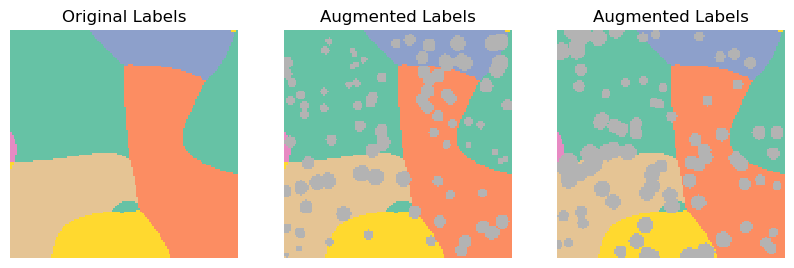

In [7]:
vmax = lab.max()
xform = SmoothBernoulliDiskTransform(radius=15, value=vmax+1, method='l2')
lab1 = xform(lab)
lab2 = xform(lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(lab.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax+2)
plt.axis('off')
plt.title('Original Labels')
plt.subplot(1, 3, 2)
plt.imshow(lab1.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax+2)
plt.axis('off')
plt.title('Augmented Labels')
plt.subplot(1, 3, 3)
plt.imshow(lab2.squeeze(), cmap='Set2', interpolation='nearest', vmin=0, vmax=vmax+2)
plt.axis('off')
plt.title('Augmented Labels')
plt.show()